In [1]:
import sys
sys.path.append("..")

In [2]:
from train_autoencoder import *
from test_autoencoder import *

In [3]:
from C2D_Models import *

In [4]:
models = [
#     C2D_AE_128_3x3(channels=1),
    C2D_AE_128_3x3(channels=1),
         ]

model_names = [
#     "C2D_3x3_128_2xE_L2_FP",
    "C2D_3x3_128_2xE_L2_HP",
]

model_names = [join_paths(["../../VAD_models/C2D_AE_models/128/experiments/half_precision/", mn+"_MSE_UCSD2"]) for mn in model_names]    

# Training

In [6]:
optimizers = [ADAM(m) for m in models]
losses = [MSE_LOSS() for m in models]

In [7]:
train_data = UCSD(2)

16it [00:02,  7.07it/s]


In [8]:
train_loader, val_loader = get_data_loaders(train_data, batch_size=128)

In [9]:
trainer = AutoEncoder_Trainer(
    models,
    model_names,
    train_loader, 
    val_loader,
    optimizers,
    losses,
    epochs = 300,
)

Estimated Time 0.21 hours | Will be completed by 2020-11-26 22:17:
------------------------------------------------------------
Epoch: [001/300] | time/epoch: 2.47 seconds
------------------------------------------------------------
Model: ../../VAD_models/C2D_AE_models/128/experiments/half_precision/C2D_3x3_128_2xE_L2_HP_MSE_UCSD2/C2D_3x3_128_2xE_L2_HP_MSE_UCSD2.pth.tar
                Loss
Training    0.028089
Validation  0.042650
----------------------------------------
------------------------------------------------------------
Epoch: [002/300] | time/epoch: 2.46 seconds
------------------------------------------------------------
Model: ../../VAD_models/C2D_AE_models/128/experiments/half_precision/C2D_3x3_128_2xE_L2_HP_MSE_UCSD2/C2D_3x3_128_2xE_L2_HP_MSE_UCSD2.pth.tar
                Loss
Training    0.009143
Validation  0.016948
----------------------------------------
------------------------------------------------------------
Epoch: [003/300] | time/epoch: 2.45 seconds
------

['../../VAD_models/C2D_AE_models/128/experiments/half_precision/C2D_3x3_128_2xE_L2_HP_MSE_UCSD2']

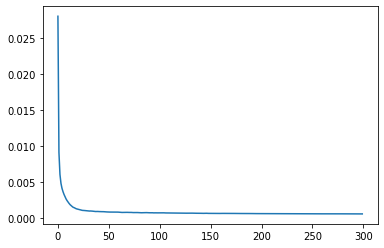

In [10]:
trainer.train()

In [11]:
for ae_model in trainer.autoencoder_models:
    save_model(ae_model.model, ae_model.model_file)

In [12]:
print("Training done")

Training done


# Testing

In [13]:
test_data = UCSD(2, isTrain=False, sample_stride = 1)

12it [00:01,  6.90it/s]


In [14]:
for ae_model in trainer.autoencoder_models:
    print("-"*40)
    print(ae_model.model_file)
    tester = AutoEncoder_Tester(
        ae_model.model,
        test_data,
    )
    results = tester.test(save_as = ".pkl".join(ae_model.model_file.split(".pth.tar")))
    print("="*40)

0it [00:00, ?it/s]

----------------------------------------
../../VAD_models/C2D_AE_models/128/experiments/half_precision/C2D_3x3_128_2xE_L2_HP_MSE_UCSD2/C2D_3x3_128_2xE_L2_HP_MSE_UCSD2.pth.tar


7it [00:14,  2.03s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


8it [00:16,  2.04s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


9it [00:17,  1.86s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


10it [00:19,  1.84s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


12it [00:23,  1.96s/it]


AUC-ROC Score of  OneClassSVM: 0.4177087002465657
-------------------- TEST RESULTS --------------------
{'agg_abs_reg_aucroc': 0.8778927439239168,
 'agg_sqr_reg_aucroc': 0.8437460373370904,
 'mean_abs_vid_aucroc': 0.905297580577974,
 'mean_sqr_vid_aucroc': 0.850003307347915,
 'overall_abs_aucroc': 0.6731578020429729,
 'overall_sqr_aucroc': 0.6695693906305037}


<Figure size 432x288 with 0 Axes>

In [15]:
try:
    del test_data
except:
    pass
test_data = UCSD(2, isTrain=False, sample_stride = 1, useCorrectedAnnotations = False)

12it [00:01,  6.97it/s]


In [16]:
for ae_model in trainer.autoencoder_models:
    print("-"*40)
    print(ae_model.model_file)
    tester = AutoEncoder_Tester(
        ae_model.model,
        test_data,
    )
    results = tester.test(save_as = ".pkl".join(ae_model.model_file.split(".pth.tar")))
    print("="*40)

0it [00:00, ?it/s]

----------------------------------------
../../VAD_models/C2D_AE_models/128/experiments/half_precision/C2D_3x3_128_2xE_L2_HP_MSE_UCSD2/C2D_3x3_128_2xE_L2_HP_MSE_UCSD2.pth.tar


7it [00:14,  2.04s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


8it [00:16,  2.05s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


9it [00:17,  1.87s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


10it [00:19,  1.84s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


12it [00:23,  1.97s/it]


AUC-ROC Score of  OneClassSVM: 0.4402641071715926
-------------------- TEST RESULTS --------------------
{'agg_abs_reg_aucroc': 0.8815699927586762,
 'agg_sqr_reg_aucroc': 0.8475533712385346,
 'mean_abs_vid_aucroc': 0.9104671428403974,
 'mean_sqr_vid_aucroc': 0.852504833782217,
 'overall_abs_aucroc': 0.7035281338840316,
 'overall_sqr_aucroc': 0.6945938153730622}


<Figure size 432x288 with 0 Axes>

In [17]:
exit()

In [15]:
for ae_model in trainer.autoencoder_models:
    print("-"*40)
    print(ae_model.model_file)
    tester = AutoEncoder_Tester(
        ae_model.model,
        test_data,
    )
    results = tester.test(save_as = ".pkl".join(ae_model.model_file.split(".pth.tar")))
    print("="*40)

0it [00:00, ?it/s]

----------------------------------------
../../VAD_models/C2D_AE_models/128/experiments/weight_init/C2D_3x3_128_2xE_L2_MSE_UCSD2/C2D_3x3_128_2xE_L2_MSE_UCSD2.pth.tar


7it [00:14,  2.08s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


8it [00:16,  2.09s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


9it [00:17,  1.91s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


10it [00:19,  1.87s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


12it [00:23,  2.00s/it]
0it [00:00, ?it/s]

AUC-ROC Score of  OneClassSVM: 0.461060232476224
-------------------- TEST RESULTS --------------------
{'agg_abs_reg_aucroc': 0.8640542444522719,
 'agg_sqr_reg_aucroc': 0.8419223318069743,
 'mean_abs_vid_aucroc': 0.8966140761970254,
 'mean_sqr_vid_aucroc': 0.8416688941490238,
 'overall_abs_aucroc': 0.6628883409651285,
 'overall_sqr_aucroc': 0.6535558295174356}
----------------------------------------
../../VAD_models/C2D_AE_models/128/experiments/weight_init/C2D_3x3_128_2xE_L2_WI_MSE_UCSD2/C2D_3x3_128_2xE_L2_WI_MSE_UCSD2.pth.tar


7it [00:14,  2.06s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


8it [00:16,  2.08s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


9it [00:17,  1.90s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


10it [00:19,  1.87s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


12it [00:23,  1.99s/it]


AUC-ROC Score of  OneClassSVM: 0.39646882705177877
-------------------- TEST RESULTS --------------------
{'agg_abs_reg_aucroc': 0.8580530116238112,
 'agg_sqr_reg_aucroc': 0.84510919337795,
 'mean_abs_vid_aucroc': 0.9180431305528539,
 'mean_sqr_vid_aucroc': 0.8343003075647294,
 'overall_abs_aucroc': 0.6748274040154983,
 'overall_sqr_aucroc': 0.6593571680169074}


<Figure size 432x288 with 0 Axes>

In [19]:
for ae_model in trainer.autoencoder_models:
    print("-"*40)
    print(ae_model.model_file)
    tester = AutoEncoder_Tester(
        ae_model.model,
        test_data,
    )
    results = tester.test(save_as = ".pkl".join(ae_model.model_file.split(".pth.tar")))
    print("="*40)

0it [00:00, ?it/s]

----------------------------------------
../../VAD_models/C2D_AE_models/128/experiments/weight_init/C2D_3x3_128_2xE_L2_MSE_UCSD2/C2D_3x3_128_2xE_L2_MSE_UCSD2.pth.tar


7it [00:14,  2.08s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


8it [00:16,  2.09s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


9it [00:18,  1.91s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


10it [00:19,  1.88s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


12it [00:24,  2.00s/it]
0it [00:00, ?it/s]

AUC-ROC Score of  OneClassSVM: 0.4831538647213431
-------------------- TEST RESULTS --------------------
{'agg_abs_reg_aucroc': 0.8661637410824438,
 'agg_sqr_reg_aucroc': 0.8392015434747626,
 'mean_abs_vid_aucroc': 0.8995628838026245,
 'mean_sqr_vid_aucroc': 0.8447251985836959,
 'overall_abs_aucroc': 0.6913083999356326,
 'overall_sqr_aucroc': 0.6763748457866223}
----------------------------------------
../../VAD_models/C2D_AE_models/128/experiments/weight_init/C2D_3x3_128_2xE_L2_WI_MSE_UCSD2/C2D_3x3_128_2xE_L2_WI_MSE_UCSD2.pth.tar


7it [00:14,  2.07s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


8it [00:16,  2.09s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


9it [00:17,  1.90s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


10it [00:19,  1.88s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


12it [00:23,  2.00s/it]


AUC-ROC Score of  OneClassSVM: 0.41667951778147294
-------------------- TEST RESULTS --------------------
{'agg_abs_reg_aucroc': 0.859137813120206,
 'agg_sqr_reg_aucroc': 0.8495832886338035,
 'mean_abs_vid_aucroc': 0.9182424731713481,
 'mean_sqr_vid_aucroc': 0.8342097128196919,
 'overall_abs_aucroc': 0.7041349300005364,
 'overall_sqr_aucroc': 0.6851231025049617}


<Figure size 432x288 with 0 Axes>